# STUDENT PERFORMANCE ANALYSIS
## CLASSIFICATION and CLASS IMBALANCE

#### TABLE of CONTENTS

1. Import Packages
2. Load Dataset
3. Data Preparation
4. Investigate Class Imbalance
     - Final Grade Classification
     - Final Grade Class Distribution
     
   MACHINE LEARNING PREPROCESSING
   
5. Data Preprocessing for Maching Learning
     - Encoding(One Hot Encoding and Label Encoding)
     - Data Formating(Seperating Features and Target Variables
     
6. Split Data into Traing and Testing Set

   BUILDING MACHING LEARNING MODELS on IMBALANCE DATASET
7. Random Forest Classifier
     - Fitting Random Forest Classifier on Imbalance Dataset
     - Model Prediction
     - Model Evaluation
8. Support Vector Machine
     - Fitting Support Vector Machine on Imbalance Dataset
     - Model Prediction
     - Model Evaluation
9. Multi-Layer Preceptron Neural Network
     - Fitting Multi-Layer Preceptron Neural Network on Imbalance Dataset
     - Model Prediction
     - Model Evaluation
  
10. SOLVE CLASS IMBALANCE
     - Synthentic Minority Oversampling Technique(SMOTE)
     - Adaptive Synthentic Sampling Technique (ADASYN)
     <BR>
<P> BUILDING MACHING LEARNING MODELS on a BALANCE DATASET</P>
<P> Refitting with SMOTE and ADASYN</P>
11.  Random Forest Classifier
     - Fitting Random Forest Classifier on a balance Dataset
     - Model Prediction
     - Model Evaluation
     - Hyperparameter Tuning with Grid Search
12.  Support Vector Machine
     - Fitting Support Vector Machine on Imbalance Dataset
     - Model Prediction
     - Model Evaluation  
     - Hyperparameter Tuning with Grid Search
13.  Multi-Layer Preceptron Neural Network
     - Fitting Multi-Layer Preceptron Neural Network on Imbalance Dataset
     - Model Prediction
     - Model Evaluation
     - Hyperparameter Tuning with Grid Search

    MODEL SELECTION
14. Summary

### 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV #this will do cross validation

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score



### 2. Load Dataset

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')


### 3. Data Preparation

In [71]:
# merge datasets
student = pd.concat([mat,por], ignore_index = True)

In [72]:
# rename column labels
student.columns = ["School", "Sex", "Age", "Address", "Family Size", "parent's cohabitation status", "Mother's Education", 
                   "Father's Education", "Mother's Job", "Father's Job", "Reason","Guardian", "Travel Time", "Study Time", 
                   "Failures", "School Support", "Famly Support", "Paid Classes", "Activities", "Nursery", 
                   "Higher Education", "Internet","Romantic", "Family Relationship", "Free Time", "Going Out",
                   "Workday Alcohol Consumption", "Weekend Alcohol Consumption", "Health Status", "Absences","period1_score","period2_score","final_score"]
student.head(1)

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Family Relationship,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


### 4. Investigate Class Imbalance

####  Classifying Students into Categories

In [73]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
student['final_grade'] = 'na'
student.loc[(student.final_score >= 0) & (student.final_score <= 9), 'final_grade'] = 'Poor'
student.loc[(student.final_score >= 10) & (student.final_score <= 14), 'final_grade'] = 'Average'
student.loc[(student.final_score >= 15) & (student.final_score <= 20), 'final_grade'] = 'Excellent' 

student.head(15)

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Excellent
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Average
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,Excellent
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,Average
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,Poor
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,Excellent
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,Excellent


In [74]:
student['final_grade'].value_counts()

Average      610
Poor         230
Excellent    204
Name: final_grade, dtype: int64

In [75]:
student['final_grade'][:10]

0         Poor
1         Poor
2      Average
3    Excellent
4      Average
5    Excellent
6      Average
7         Poor
8    Excellent
9    Excellent
Name: final_grade, dtype: object

In [76]:
student['final_grade'].isnull().sum()

0

In [77]:
student['final_grade'].unique()

array(['Poor', 'Average', 'Excellent'], dtype=object)

In [78]:
#droping the original column of finalscore
#student.drop([final_score], axis = 1, inplace = True)
#student["final_score"]
del student["final_score"]

In [79]:
student.head(1)

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Family Relationship,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,period1_score,period2_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,Poor


### Final Grade Class Distribution

Text(0, 0.5, 'Number of Student')

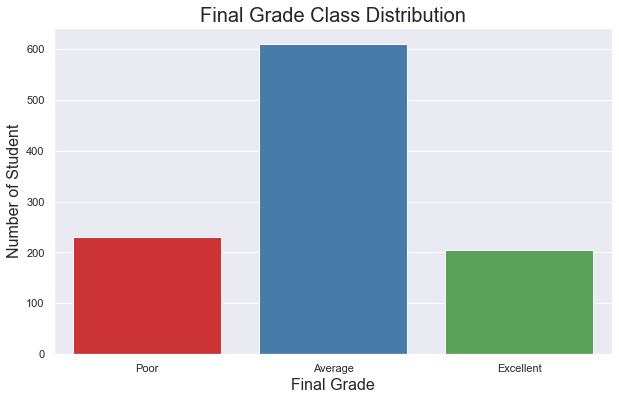

In [80]:
# Final Grade Countplot
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")


sns.countplot(x = student.final_grade, order =["Poor","Average","Excellent"], palette='Set1')
plt.title('Final Grade Class Distribution',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

<AxesSubplot:xlabel='final_grade', ylabel='count'>

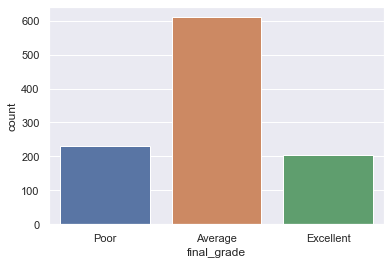

In [81]:
sns.countplot(x = student['final_grade'])

In [82]:
student.final_grade.value_counts()

Average      610
Poor         230
Excellent    204
Name: final_grade, dtype: int64

In [83]:
student["final_grade"].value_counts()

Average      610
Poor         230
Excellent    204
Name: final_grade, dtype: int64

## Machine Learning Preprocessing

### 5. Data Preprocessing for Machine Learning

### Encoding - One Hot Encoding

In [84]:
student.dtypes
#we have some objects which means string

School                          object
Sex                             object
Age                              int64
Address                         object
Family Size                     object
parent's cohabitation status    object
Mother's Education               int64
Father's Education               int64
Mother's Job                    object
Father's Job                    object
Reason                          object
Guardian                        object
Travel Time                      int64
Study Time                       int64
Failures                         int64
School Support                  object
Famly Support                   object
Paid Classes                    object
Activities                      object
Nursery                         object
Higher Education                object
Internet                        object
Romantic                        object
Family Relationship              int64
Free Time                        int64
Going Out                

In [85]:
#making a list of non numeric columns using list comprehension

nonnumericcolumns = [student.columns[index] for index, dtype in enumerate(student.dtypes) if dtype =='object']
nonnumericcolumns

['School',
 'Sex',
 'Address',
 'Family Size',
 "parent's cohabitation status",
 "Mother's Job",
 "Father's Job",
 'Reason',
 'Guardian',
 'School Support',
 'Famly Support',
 'Paid Classes',
 'Activities',
 'Nursery',
 'Higher Education',
 'Internet',
 'Romantic',
 'final_grade']

In [86]:
for column in nonnumericcolumns:
    print(f"{column}:{student[column].unique()}")

School:['GP' 'MS']
Sex:['F' 'M']
Address:['U' 'R']
Family Size:['GT3' 'LE3']
parent's cohabitation status:['A' 'T']
Mother's Job:['at_home' 'health' 'other' 'services' 'teacher']
Father's Job:['teacher' 'other' 'services' 'health' 'at_home']
Reason:['course' 'other' 'home' 'reputation']
Guardian:['mother' 'father' 'other']
School Support:['yes' 'no']
Famly Support:['no' 'yes']
Paid Classes:['no' 'yes']
Activities:['no' 'yes']
Nursery:['yes' 'no']
Higher Education:['yes' 'no']
Internet:['no' 'yes']
Romantic:['no' 'yes']
final_grade:['Poor' 'Average' 'Excellent']


In [87]:
#lots of these features are binary variables
#so for the two values i will use label encoder becasuse it does not really matter how we order two values

#i will use one hot encording for the features with non binanry values
#more that 2 values because there are some sort of order among the values

# for mothers job.fathers job reason and guardian we that the values "other" in them
#which will be difficult because with one hot encoding i will make new columns
#that take the name of the values in each of the features
#which means i will have four duplicates columns called other which is not advisable

#to resolve this i will append an indicator at the beginning of each columns to indicate which column it is coming from

#so for mother's job, i will use apply to apply a lambda function, it takes in a value of the column and it will output that same value 
#but with a appended to the front for fater job i appended f at the begining, so it would show m-other, f-other, etc, this will eradicate duplicates when we are using one hot encoding

student["Mother's Job" ] = student["Mother's Job" ].apply(lambda x: "m_" + x )
        
student["Father's Job"] = student["Father's Job"].apply(lambda x: "f_" + x)

student[ "Reason" ] = student[ "Reason" ].apply(lambda x: "r_" + x)

student[ "Guardian" ] = student[ "Guardian" ].apply(lambda x: "g_" + x)


In [88]:
# checking what dummines matrix look like for mother job
# I am using one hot encoding bcos if i should N-gram:- n=1 Unigram,    n=2 Bigram ..... 
# pandas will see a value assigned to 4 as an high value

# CONCATENATING ALL DUMMIES COLUMNS TOGETHER

dummies = pd.concat([pd.get_dummies(student["Mother's Job"]),
                    pd.get_dummies(student["Father's Job"]),
                    pd.get_dummies(student["Reason"]),
                    pd.get_dummies(student["Guardian"])], 
                    axis =1)


In [89]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1040,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1041,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1042,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [90]:
# concatinating the dummy variable to our dataset and droping the original columns

student = pd.concat([student, dummies], axis = 1)

#droping the original columns
student.drop(["Mother's Job", "Father's Job", "Reason","Guardian"], axis = 1, inplace = True)


In [91]:
student

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Travel Time,Study Time,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,MS,F,18,U,LE3,T,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,MS,F,18,U,GT3,T,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [92]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Label Encoding 

In [93]:
nonnumericcolumns = [student.columns[index] for index, dtype in enumerate(student.dtypes) if dtype =='object']
nonnumericcolumns

['School',
 'Sex',
 'Address',
 'Family Size',
 "parent's cohabitation status",
 'School Support',
 'Famly Support',
 'Paid Classes',
 'Activities',
 'Nursery',
 'Higher Education',
 'Internet',
 'Romantic',
 'final_grade']

In [94]:
#label enconder
#so right now all we have is just binanry values, so i would used lable encoding for every one

for column in nonnumericcolumns:
    print(f"{column}:{student[column].unique()}")

School:['GP' 'MS']
Sex:['F' 'M']
Address:['U' 'R']
Family Size:['GT3' 'LE3']
parent's cohabitation status:['A' 'T']
School Support:['yes' 'no']
Famly Support:['no' 'yes']
Paid Classes:['no' 'yes']
Activities:['no' 'yes']
Nursery:['yes' 'no']
Higher Education:['yes' 'no']
Internet:['no' 'yes']
Romantic:['no' 'yes']
final_grade:['Poor' 'Average' 'Excellent']


In [95]:
encoder = LabelEncoder()
for column in nonnumericcolumns:
    student[column] = encoder.fit_transform(student[column])

In [96]:
student.dtypes
#or
for dtype in student.dtypes:
    print(dtype)

int32
int32
int64
int32
int32
int32
int64
int64
int64
int64
int64
int32
int32
int32
int32
int32
int32
int32
int32
int64
int64
int64
int64
int64
int64
int64
int64
int64
int32
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [97]:
student["final_grade"].value_counts().nunique()

3

In [98]:
student["final_grade"][:10]

0    2
1    2
2    0
3    1
4    0
5    1
6    0
7    2
8    1
9    1
Name: final_grade, dtype: int32

<AxesSubplot:xlabel='final_grade', ylabel='count'>

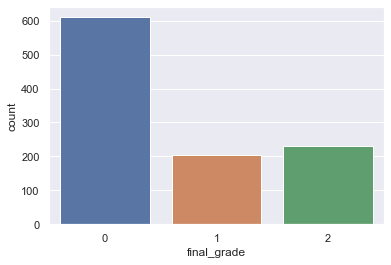

In [99]:
sns.countplot(x = student["final_grade"])

In [100]:
student["final_grade"].value_counts()

0    610
2    230
1    204
Name: final_grade, dtype: int64

### Data Formating
### Separating the Features and the Target variable

In [101]:
y = student["final_grade"]
x = student.drop('final_grade', axis = 1)

In [102]:
y.unique()

array([2, 0, 1])

In [103]:
y.value_counts()

0    610
2    230
1    204
Name: final_grade, dtype: int64

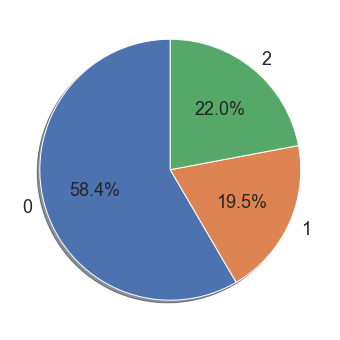

In [104]:
plt.rcParams["figure.figsize"] = (15,6)
unique_elements, counts_elements = np.unique(y,return_counts = True)
fig1, ax1 = plt.subplots()
ax1.pie(counts_elements, labels = unique_elements, autopct='%.1f%%', shadow =True, startangle=90, textprops = {'fontsize': 18})
plt.show()

In [105]:
# scaling x using sk learns standard scaler which gives every feature unique variance

#scaler = StandardScaler()
#x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [106]:
x

output = None

### 6. Split dataset into Training and Testing set

In [107]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing set (80/20)

x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size = 0.20, random_state = 42)

In [108]:
# FEATURES SCALING

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [109]:
x_train[:5]

array([[-0.59071983,  1.11833531, -0.58511174,  0.62212795, -0.63325091,
         0.36675724, -0.56825442, -1.28210135,  3.31007524, -1.14639316,
        -0.37848294, -0.35188399, -1.24015883, -0.50373977, -1.00359929,
         0.49437974,  0.30249507, -1.97054331, -0.74493948, -1.02038272,
        -1.17958973, -1.88202685, -0.55574789, -1.02310781, -1.07389358,
        -0.07091948, -0.75032788, -0.70243992,  2.13697606, -0.31183405,
        -0.79426656, -0.53534546, -0.37303373, -0.24145734, -0.19962605,
         0.8941862 , -0.62954036, -0.26811758,  1.21260637, -0.58149895,
        -0.33665016, -0.56305835, -0.56674733,  0.66119383, -0.25505102],
       [-0.59071983, -0.8941862 ,  0.23463373,  0.62212795,  1.57915289,
         0.36675724,  1.22566785, -0.37485167, -0.71504052,  2.41652851,
        -0.37848294, -0.35188399,  0.80634833,  1.98515198,  0.99641362,
         0.49437974,  0.30249507,  0.50747426, -0.74493948,  0.0567596 ,
        -1.17958973, -0.15035476, -0.55574789, -1.

## Building Machine Learing Models on Imbalance Dataset

### Fitting a RandomForestClassifier on an Imbalance dataset

In [110]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest  model 
rf_model = RandomForestClassifier(random_state = 42)


In [111]:
# looking at the shape

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (835, 45)
Training Labels Shape: (835,)
Testing Features Shape: (209, 45)
Testing Labels Shape: (209,)


In [112]:
# Fitting the Random Forest Classifier model to the training data
rf_model.fit(x_train, y_train)
# Model prediction
rf_pred = rf_model.predict(x_test)

### Accuracy of the RandomForestClassifier Model on an Imbalance dataset

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
print("Accuracy:",accuracy_score(y_test, rf_pred))
pd.crosstab(y_test,rf_pred)

Accuracy: 0.8181818181818182


col_0,0,1,2
final_grade,,,
0,102,0,4
1,9,34,0
2,25,0,35


In [115]:
rf_pred[:10]

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0])

In [116]:
y_test[:10]

971    0
280    2
536    0
824    0
644    0
777    0
978    2
231    0
660    1
548    0
Name: final_grade, dtype: int32

In [117]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})[:10]
df

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,0
548,0,0


### Random Forest Classifier Model Evaluation on an Imbalance dataset

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cm

array([[102,   0,   4],
       [  9,  34,   0],
       [ 25,   0,  35]], dtype=int64)

In [120]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(rf_cm,
                     index = ['AVERAGE','EXCELLENT','POOR'], 
                     columns = ['AVERAGE','EXCELLENT','POOR'])

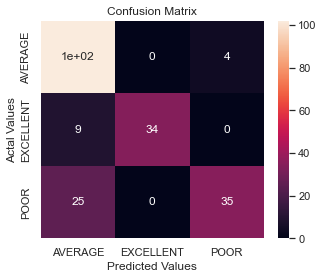

In [121]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actal Values')

plt.show()


In [122]:
unique_element, counts_elements = np.unique(y_test, return_counts = True)
print(unique_elements, counts_elements)

#in the test dataset we have 43(9+34+0) and 60(25+0+35) samples in the minority class
# and we have 106 (102+0+4) samples in the majority class


[0 1 2] [106  43  60]


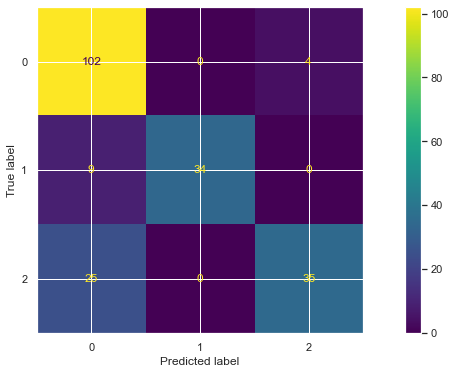

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

plt.show()

In [124]:
print(classification_report(y_test, rf_pred))
#recall is the accuracy of each metrics of 0,1,2

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       106
           1       1.00      0.79      0.88        43
           2       0.90      0.58      0.71        60

    accuracy                           0.82       209
   macro avg       0.88      0.78      0.81       209
weighted avg       0.84      0.82      0.81       209



### 8. Fitting a Support Vector Machine on an Imbalance dataset

In [125]:
svm_model = SVC(kernel='rbf', C=1, gamma='auto',random_state = 42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

In [126]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':svm_pred})[:15]
df

,Actual,Predicted
971,0,0
280,2,0
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


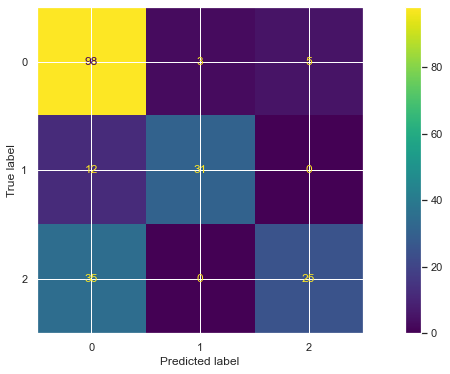

In [127]:
svm_cm = confusion_matrix(y_test, svm_pred, labels= svm_model.classes_)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
svm_disp.plot()

plt.show()

In [128]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, svm_pred))
pd.crosstab(y_test,svm_pred)

svm_cm= confusion_matrix(y_test,svm_pred)

svm_cm


Accuracy: 0.7368421052631579


array([[98,  3,  5],
       [12, 31,  0],
       [35,  0, 25]], dtype=int64)

In [129]:
print(classification_report(y_test, svm_pred))
#recall is the accuracy of each metrics of 0,1,2

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       106
           1       0.91      0.72      0.81        43
           2       0.83      0.42      0.56        60

    accuracy                           0.74       209
   macro avg       0.81      0.69      0.71       209
weighted avg       0.77      0.74      0.72       209



### 9. Fitting a Multi-Layer-Preceptron Neural Networks on an Imbalance dataset

In [130]:
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(random_state = 42, hidden_layer_sizes=(150,100,50), activation='relu', solver='adam', max_iter=500)

mlp_model.fit(x_train,y_train)

mlp_pred = mlp_model.predict(x_test)

print(mlp_model.score(x_test, y_test))

0.7894736842105263


In [131]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':mlp_pred})[:15]
df

,Actual,Predicted
971,0,0
280,2,0
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,0
548,0,0


In [132]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,mlp_pred))

print(classification_report(y_test,mlp_pred))

[[98  4  4]
 [10 33  0]
 [26  0 34]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       106
           1       0.89      0.77      0.82        43
           2       0.89      0.57      0.69        60

    accuracy                           0.79       209
   macro avg       0.84      0.75      0.78       209
weighted avg       0.81      0.79      0.78       209



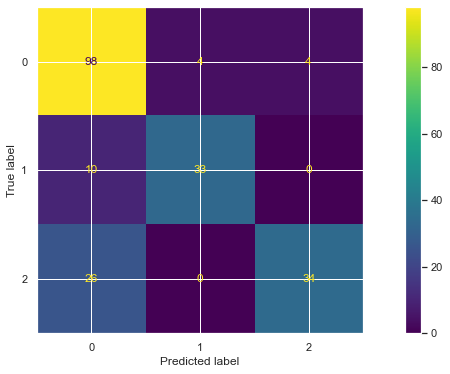

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, mlp_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()

plt.show()

## 10. Solve Imbalance Dataset 

### Using SMOTE - Synthetic Minority Oversampling Technique

In [134]:
#install the smote package 
!pip install imblearn --user
#or
#!pip install imbalanced-learn --user

output = None

You should consider upgrading via the 'C:\Users\D.B.I\anaconda3\python.exe -m pip install --upgrade pip' command.


In [135]:
#import SMOTE package
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

#tranform the traning data only
#assigning flaot to x_train bcos we want it as a contineous value

x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'), y_train)


In [136]:
#to import class counter
from collections import Counter
print("Before SMOTE:" ,Counter(y_train) )
print("After SMOTE:" ,Counter(y_train_smote) )
print(y_train_smote.value_counts())

Before SMOTE: Counter({0: 504, 2: 170, 1: 161})
After SMOTE: Counter({0: 504, 2: 504, 1: 504})
0    504
2    504
1    504
Name: final_grade, dtype: int64


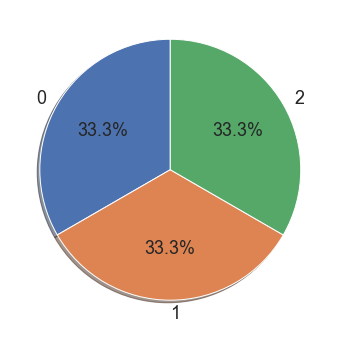

In [137]:
plt.rcParams["figure.figsize"] = (10,6)
unique_elements, counts_elements = np.unique(y_train_smote,return_counts = True)
fig1, ax1 = plt.subplots()
ax1.pie(counts_elements, labels = unique_elements, autopct='%.1f%%', shadow =True, startangle=90, textprops = {'fontsize': 18})
plt.show()


## Solve imbalance dataset using ADASYN - Adaptive Synthetic Sampling

In [138]:
#import ADASYN package
from imblearn.over_sampling import ADASYN 
adasyn = ADASYN(random_state=42)

#tranform the traning data only
#assigning flaot to x_train bcos we want it as a contineous value

x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train.astype('float'), y_train)


In [139]:
#to import class counter
from collections import Counter
print("Before ADASYN:" ,Counter(y_train) )
print("After ADASYN:" ,Counter(y_train_adasyn) )

Before ADASYN: Counter({0: 504, 2: 170, 1: 161})
After ADASYN: Counter({1: 517, 0: 504, 2: 488})


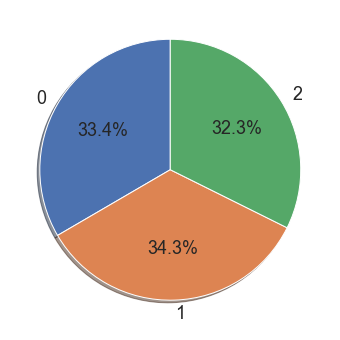

In [140]:
plt.rcParams["figure.figsize"] = (6,6)
unique_elements, counts_elements = np.unique(y_train_adasyn,return_counts = True)
fig1, ax1 = plt.subplots()
ax1.pie(counts_elements, labels = unique_elements, autopct='%.1f%%', shadow =True, startangle=90, textprops = {'fontsize': 18})
plt.show()

## SMOTE 

### 11. Refitting Random Forest Classifier With SMOTE 

In [141]:
#Refitting the balance SMOTE on the random forest classifier 

rf_model.fit(x_train_smote, y_train_smote)
rf_pred = rf_model.predict(x_test)
print(accuracy_score(y_test, rf_pred))
pd.crosstab(y_test,rf_pred)

0.8325358851674641


col_0,0,1,2
final_grade,,,
0,85,6,15
1,1,42,0
2,13,0,47


In [142]:
rf_pred[:10]

array([0, 2, 0, 0, 0, 0, 2, 0, 1, 0])

In [143]:
y_test[:10]

971    0
280    2
536    0
824    0
644    0
777    0
978    2
231    0
660    1
548    0
Name: final_grade, dtype: int32

In [144]:
smoterf=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})[:10]
smoterf

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


### Random Forest Classifier Model Evaluation With SMOTE Technique

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

In [146]:
#confusion metrics
print(confusion_matrix(y_test, rf_pred))

[[85  6 15]
 [ 1 42  0]
 [13  0 47]]


In [147]:
unique_element, counts_elements = np.unique(y_test, return_counts = True)
print(unique_elements, counts_elements)

[0 1 2] [106  43  60]


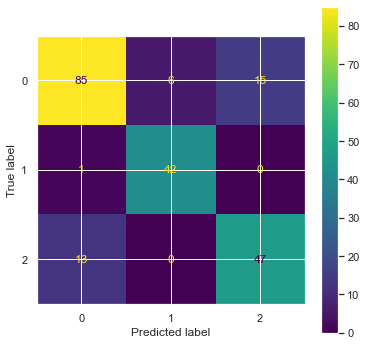

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

plt.show()

In [149]:
print(classification_report(y_test, rf_pred))

#recall is the accuracy of each metrics of 0,1,2

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       106
           1       0.88      0.98      0.92        43
           2       0.76      0.78      0.77        60

    accuracy                           0.83       209
   macro avg       0.83      0.85      0.84       209
weighted avg       0.83      0.83      0.83       209



#### Parameter Optimization for Random Forest Classifier with GridSearchCV (SMOTE)

In [150]:
from sklearn.model_selection import GridSearchCV
n_estimators_list = [130,160,190]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [35,55]
# Minimum number of samples required to split a node
min_samples_split = [0.001, 0.005]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.001, 0.005]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [151]:
param_grid = {'n_estimators': n_estimators_list,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)   

{'n_estimators': [130, 160, 190], 'max_features': ['auto', 'sqrt'], 'max_depth': [35, 55], 'min_samples_split': [0.001, 0.005], 'min_samples_leaf': [0.001, 0.005], 'bootstrap': [True, False]}


In [152]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4,return_train_score = True)


In [153]:
rf_grid.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [35, 55],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             return_train_score=True, verbose=2)

In [154]:
rf_smote_pred = rf_grid.predict(x_test)

In [218]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 35,
 'max_features': 'auto',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 160}

In [90]:
rf_grid.best_score_

0.9299543199353048

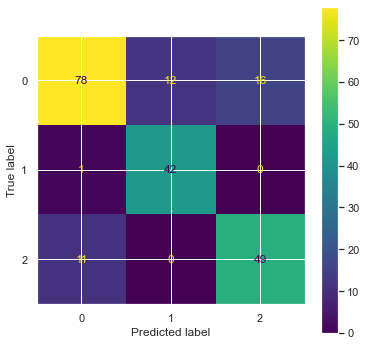

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       106
           1       0.78      0.98      0.87        43
           2       0.75      0.82      0.78        60

    accuracy                           0.81       209
   macro avg       0.80      0.84      0.82       209
weighted avg       0.82      0.81      0.81       209



In [219]:

cm = confusion_matrix(y_test, rf_smote_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

plt.show()

print(classification_report(y_test, rf_smote_pred))

### 12. Refitting Support Vector Machine on SMOTE 

In [220]:
#Refitting the balance SMOTE on the random forest classifier 

svm_model.fit(x_train_smote, y_train_smote)
svm_pred = svm_model.predict(x_test)
print(accuracy_score(y_test, svm_pred))
pd.crosstab(y_test,svm_pred)

0.7942583732057417


col_0,0,1,2
final_grade,,,
0,92,7,7
1,8,35,0
2,21,0,39


In [221]:
smotesvm=pd.DataFrame({'Actual':y_test, 'Predicted':svm_pred})[:10]
smotesvm

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


[[92  7  7]
 [ 8 35  0]
 [21  0 39]]


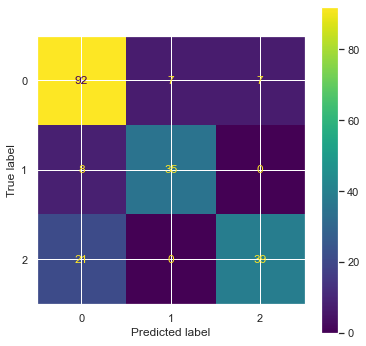

In [222]:
print(confusion_matrix(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

plt.show()

In [223]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       106
           1       0.83      0.81      0.82        43
           2       0.85      0.65      0.74        60

    accuracy                           0.79       209
   macro avg       0.81      0.78      0.79       209
weighted avg       0.80      0.79      0.79       209



### Optimization Parameters with Cross Validation and GridSearchCV for SVM (SMOTE)

In [224]:
svm_grid = [{'C':[0.5, 1, 10, 10],
            'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']},]

svm_optimal_params = GridSearchCV(SVC(), svm_grid, cv=5, scoring = 'accuracy')

svm_optimal_params.fit(x_train_smote, y_train_smote)
print(svm_optimal_params.best_params_)
print(svm_optimal_params.score(x_test, y_test))

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7990430622009569


#### Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine (SMOTE)

In [225]:
svm_model = SVC(kernel='rbf',random_state = 42, C= 100, gamma = 0.001)
svm_model.fit(x_train_smote, y_train_smote)

SVC(C=100, gamma=0.001, random_state=42)

In [226]:
svm_grid_pred  = svm_optimal_params.predict(x_test)

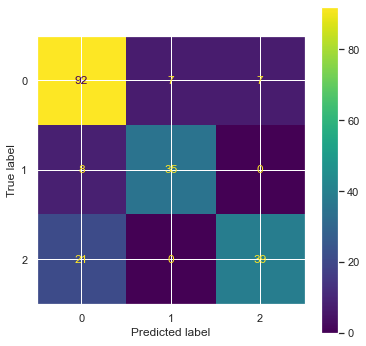

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       106
           1       0.83      0.81      0.82        43
           2       0.95      0.58      0.72        60

    accuracy                           0.80       209
   macro avg       0.84      0.77      0.79       209
weighted avg       0.82      0.80      0.79       209



In [227]:

cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

plt.show()
svm_optimal_params

print(classification_report(y_test, svm_grid_pred))

#recall is the accuracy of each metrics of 0,1,2

### Optimization Parameters with Cross Validation and RandomSearchCV for SVM (SMOTE)

In [99]:
svm_rdgrid = [{'C':[0.1, 1, 10, 100],
            'gamma': [ 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']},]

svm_model = SVC(gamma = 'auto', random_state = 42)

In [100]:
from sklearn.model_selection import RandomizedSearchCV

svm_optimal_params = RandomizedSearchCV(estimator = svm_model,param_distributions = svm_rdgrid, cv=5, verbose = 2, n_jobs = 4, scoring = 'accuracy', random_state = 42)

svm_optimal_params.fit(x_train_smote, y_train_smote)
print(svm_optimal_params.best_params_)
print(svm_optimal_params.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
0.9444408016960637


In [101]:
svm_ytest_pred  = svm_optimal_params.predict(x_test)

In [102]:
print(f'Accuracy -:{svm_optimal_params.score(x_test,svm_ytest_pred):.3f}')

Accuracy -:1.000


In [103]:
print(classification_report(y_test, svm_ytest_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       106
           1       0.86      0.84      0.85        43
           2       0.95      0.63      0.76        60

    accuracy                           0.82       209
   macro avg       0.86      0.80      0.82       209
weighted avg       0.84      0.82      0.82       209



### 13. Refitting Multi-Layer-Preceptron Neural Network on SMOTE  

In [228]:

mlp_model.fit(x_train_smote, y_train_smote)
mlp_pred = mlp_model.predict(x_test)
print(accuracy_score(y_test, mlp_pred))
pd.crosstab(y_test,mlp_pred)

0.7894736842105263


col_0,0,1,2
final_grade,,,
0,94,7,5
1,8,35,0
2,24,0,36


In [229]:
smotemlp=pd.DataFrame({'Actual':y_test, 'Predicted':mlp_pred})[:10]
smotemlp

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,0
548,0,0


[[94  7  5]
 [ 8 35  0]
 [24  0 36]]


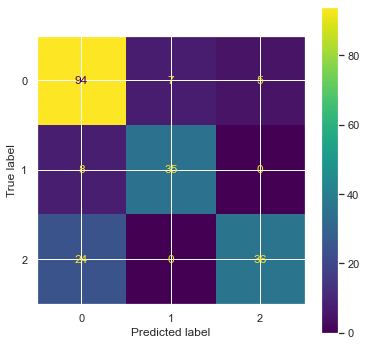

In [230]:
print(confusion_matrix(y_test, mlp_pred))

cm = confusion_matrix(y_test, mlp_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()

plt.show()

In [107]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       106
           1       0.83      0.81      0.82        43
           2       0.88      0.60      0.71        60

    accuracy                           0.79       209
   macro avg       0.82      0.77      0.78       209
weighted avg       0.80      0.79      0.79       209



### Parameter Optimization for neural network  with Grid Search (SMOTE)

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state = 42)
mlp_grid_value = {'max_iter' :[500, 1000, 2000], 'hidden_layer_sizes':[(2,), (3,), (10,), (20,)]}
mlp_grid = GridSearchCV(mlp_model, param_grid = mlp_grid_value, scoring = 'accuracy', cv = 5)



In [232]:
mlp_grid.fit(x_train_smote, y_train_smote)

C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(2,), (3,), (10,), (20,)],
                         'max_iter': [500, 1000, 2000]},
             scoring='accuracy')

In [233]:
mlp_grid.best_params_

{'hidden_layer_sizes': (20,), 'max_iter': 1000}

In [234]:
#accuracy of the best score
mlp_grid.best_score_

0.9338600747491969

In [235]:
mlp_ytest_pred = mlp_grid.predict(x_test)

In [236]:
# Evaluation of the tuned parameter
print('confusion_matris:')
print(confusion_matrix(y_test, mlp_ytest_pred))
print('accuracy:')
print(accuracy_score(y_test, mlp_ytest_pred))

confusion_matris:
[[91  7  8]
 [ 6 37  0]
 [24  0 36]]
accuracy:
0.784688995215311


In [237]:
print(classification_report(y_test, mlp_ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       106
           1       0.84      0.86      0.85        43
           2       0.82      0.60      0.69        60

    accuracy                           0.78       209
   macro avg       0.80      0.77      0.78       209
weighted avg       0.79      0.78      0.78       209



## ADASYN

### 14.  Refitting Random Forest Classifier on ADASYN

In [238]:
#Refitting the balance SMOTE on the random forest classifier 
rf_model.fit(x_train_adasyn, y_train_adasyn)
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
pd.crosstab(y_test,y_pred)

0.8325358851674641


col_0,0,1,2
final_grade,,,
0,84,6,16
1,1,42,0
2,12,0,48


In [239]:
#checking the predicted and actual values

adasyndf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})[:15]
adasyndf

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


In [240]:
#ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
#plt.show()
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#plt.show()

### Random Forest Classifier Model Evaluation with ADASYN Technique

In [241]:
#confusion metrics
print(confusion_matrix(y_test, y_pred))

[[84  6 16]
 [ 1 42  0]
 [12  0 48]]


In [242]:
unique_element, counts_elements = np.unique(y_test, return_counts = True)
print(unique_elements, counts_elements)

[0 1 2] [106  43  60]


In [244]:
print(classification_report(y_test, y_pred))

#recall is the accuracy of each metrics of 0,1,2

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       106
           1       0.88      0.98      0.92        43
           2       0.75      0.80      0.77        60

    accuracy                           0.83       209
   macro avg       0.83      0.86      0.84       209
weighted avg       0.83      0.83      0.83       209



### Parameter Optimization for Random Forest Classifier with  (ADASYN) using GridSearchCV

In [245]:
from sklearn.model_selection import GridSearchCV
n_estimators_list = [130,160,190]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [35,55]
# Minimum number of samples required to split a node
min_samples_split = [0.001, 0.005]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.001, 0.005]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [246]:
param_adasyn_grid = {'n_estimators': n_estimators_list,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_adasyn_grid) 

{'n_estimators': [130, 160, 190], 'max_features': ['auto', 'sqrt'], 'max_depth': [35, 55], 'min_samples_split': [0.001, 0.005], 'min_samples_leaf': [0.001, 0.005], 'bootstrap': [True, False]}


In [247]:
from sklearn.model_selection import GridSearchCV
rf_adasyn_grid = GridSearchCV(estimator = rf_model, param_grid = param_adasyn_grid, cv = 5, verbose = 2, n_jobs = 4,return_train_score = True)


In [248]:
rf_adasyn_grid.fit(x_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [35, 55],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             return_train_score=True, verbose=2)

In [249]:
rf_adasyn_pred = rf_adasyn_grid.predict(x_test)

In [250]:
rf_adasyn_grid.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'auto',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.005,
 'n_estimators': 160}

In [251]:
rf_adasyn_grid.best_score_

0.9271237156498205

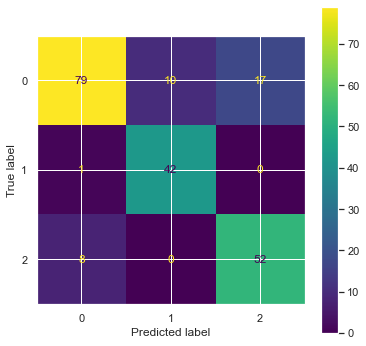

              precision    recall  f1-score   support

           0       0.90      0.75      0.81       106
           1       0.81      0.98      0.88        43
           2       0.75      0.87      0.81        60

    accuracy                           0.83       209
   macro avg       0.82      0.86      0.83       209
weighted avg       0.84      0.83      0.83       209



In [252]:

cm = confusion_matrix(y_test, rf_adasyn_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

plt.show()

print(classification_report(y_test, rf_adasyn_pred))

### 14. Refitting Support Vector Machine on ADASYN 

In [253]:
svm_model.fit(x_train_adasyn, y_train_adasyn)
svm_pred = svm_model.predict(x_test)
print(accuracy_score(y_test, svm_pred))
pd.crosstab(y_test,svm_pred)

0.8373205741626795


col_0,0,1,2
final_grade,,,
0,93,5,8
1,2,41,0
2,19,0,41


In [254]:
adasynsvm = pd.DataFrame({'Actual':y_test, 'Predicted':svm_pred})[:15]
adasynsvm

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


In [255]:
print(confusion_matrix(y_test, svm_pred))

[[93  5  8]
 [ 2 41  0]
 [19  0 41]]


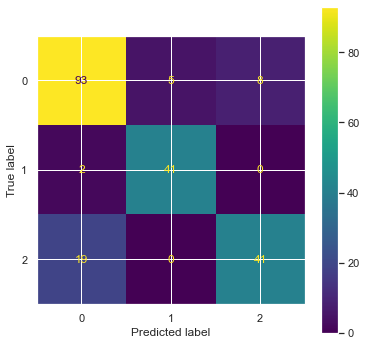

In [256]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

plt.show()

In [257]:
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.89      0.95      0.92        43
           2       0.84      0.68      0.75        60

    accuracy                           0.84       209
   macro avg       0.85      0.84      0.84       209
weighted avg       0.84      0.84      0.83       209



#### Optimization Parameters with Cross Validation and GridSearchCV for SVM (ADASYN)

In [258]:
svm_grid = [{'C':[0.5, 1, 10, 10],
            'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']},]

svm_optimal_params = GridSearchCV(SVC(), svm_grid, cv=5, scoring = 'accuracy')

svm_optimal_params.fit(x_train_adasyn, y_train_adasyn)
print(svm_optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [259]:
svm_ytest_adasyn_pred = svm_optimal_params.predict(x_test)

##### Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine (ADASYN)

In [260]:
svm_model = SVC(kernel='rbf',random_state = 42, C= 100, gamma = 0.001)
svm_model.fit(x_train_adasyn, y_train_adasyn)

SVC(C=100, gamma=0.001, random_state=42)

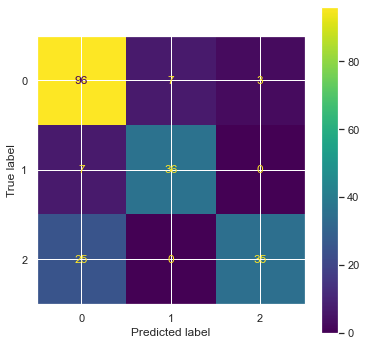

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       106
           1       0.84      0.84      0.84        43
           2       0.92      0.58      0.71        60

    accuracy                           0.80       209
   macro avg       0.84      0.78      0.79       209
weighted avg       0.82      0.80      0.79       209



In [261]:
cm = confusion_matrix(y_test, svm_ytest_adasyn_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

plt.show()

print(classification_report(y_test, svm_ytest_adasyn_pred))


### 16. Refitting Multi-Layer-Preceptron Neural Networks on ADASYN 

In [262]:
mlp_model.fit(x_train_adasyn, y_train_adasyn)
mlp_pred = mlp_model.predict(x_test)
print(accuracy_score(y_test, mlp_pred))
pd.crosstab(y_test,mlp_pred)

0.7894736842105263


C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


col_0,0,1,2
final_grade,,,
0,93,7,6
1,7,36,0
2,24,0,36


In [263]:
adasynmlp = pd.DataFrame({'Actual':y_test, 'Predicted':mlp_pred})[:15]
adasynmlp

,Actual,Predicted
971,0,0
280,2,2
536,0,0
824,0,0
644,0,0
777,0,0
978,2,2
231,0,0
660,1,1
548,0,0


In [264]:
print(confusion_matrix(y_test, mlp_pred))

[[93  7  6]
 [ 7 36  0]
 [24  0 36]]


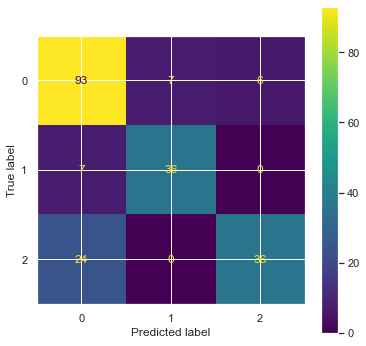

In [265]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, mlp_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()

plt.show()

In [266]:
print(classification_report(y_test, mlp_pred))


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.84      0.84      0.84        43
           2       0.86      0.60      0.71        60

    accuracy                           0.79       209
   macro avg       0.81      0.77      0.78       209
weighted avg       0.80      0.79      0.79       209



### Parameter Optimization for neural network  with Grid Search (ADASYN)

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state = 42)
mlp_grid_value = {'max_iter' :[500, 1000, 2000], 'hidden_layer_sizes':[(2,), (3,), (10,), (20,)]}
mlp_grid_adasyn = GridSearchCV(mlp_model, param_grid = mlp_grid_value, scoring = 'accuracy', cv = 5)


In [268]:
mlp_grid_adasyn.fit(x_train_adasyn, y_train_adasyn)


C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\D.B.I\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(2,), (3,), (10,), (20,)],
                         'max_iter': [500, 1000, 2000]},
             scoring='accuracy')

In [269]:
mlp_grid_adasyn.best_params_

{'hidden_layer_sizes': (20,), 'max_iter': 1000}

In [270]:
#accuracy of the best score
mlp_grid_adasyn.best_score_

0.9330663791775757

In [271]:
mlp_adasyn_pred = mlp_grid_adasyn.predict(x_test)

In [272]:
# Evaluation of the tuned parameter
print('confusion_matris:')
print(confusion_matrix(y_test, mlp_adasyn_pred))
print('accuracy:')
print(accuracy_score(y_test, mlp_adasyn_pred))

confusion_matris:
[[90  8  8]
 [ 7 36  0]
 [25  0 35]]
accuracy:
0.7703349282296651


In [273]:
print(classification_report(y_test, mlp_adasyn_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       106
           1       0.82      0.84      0.83        43
           2       0.81      0.58      0.68        60

    accuracy                           0.77       209
   macro avg       0.79      0.76      0.77       209
weighted avg       0.78      0.77      0.77       209



In [ ]:
df_feature_importance = pd.DataFrame(rf_model.feature_importances_, index = x.columns,columns = ['feature score'])

df_feature_importance.sort_values(by = 'feature score', ascending = False,)
df_feature_importance

#according to the random forest classifier the most important feature in predicting the final grade class is G1 and G2 , and the least important feature in predicting the final grade class is